<a href="https://colab.research.google.com/github/Ryan-alb/Binariza-o-de-imagem/blob/main/binarizar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import os
from google.colab import drive
from PIL import Image

In [22]:
#criar e abrir imagem
caminho_imagem = r"/content/image(1).png"# caminho da imagem
imagem_original = Image.open(caminho_imagem)#abrir imagem

In [34]:
#converter para cinza
def converter_para_escala_cinza(image):
  # Use the 'image' parameter instead of the global 'imagem'
  largura, altura = image.size
  imagem_cinza = Image.new("L", (largura, altura))  # Escala de cinza

  for y in range(altura):
      for x in range(largura):
          # Get pixel data
          pixel_data = image.getpixel((x, y))

          # Handle different color modes
          if len(pixel_data) == 3:  # RGB
              r, g, b = pixel_data
          elif len(pixel_data) == 4:  # RGBA
              r, g, b, _ = pixel_data  # Ignore alpha channel
          else:
              raise ValueError(f"Unsupported color mode: {len(pixel_data)} channels")  # Handle other cases

          valor_cinza = int(0.299 * r + 0.587 * g + 0.114 * b)
          imagem_cinza.putpixel((x, y), valor_cinza)

  return imagem_cinza

In [25]:
#binarização
def binarizar_imagem(imagem_cinza, limiar=127):
  largura, altura = imagem_cinza.size
  imagem_binaria = Image.new("1", (largura, altura))  # Binária

  for y in range(altura):
      for x in range(largura):
          valor_cinza = imagem_cinza.getpixel((x, y))
          valor_binario = 1 if valor_cinza > limiar else 0
          imagem_binaria.putpixel((x, y), valor_binario)

  return imagem_binaria

Imagem Original:


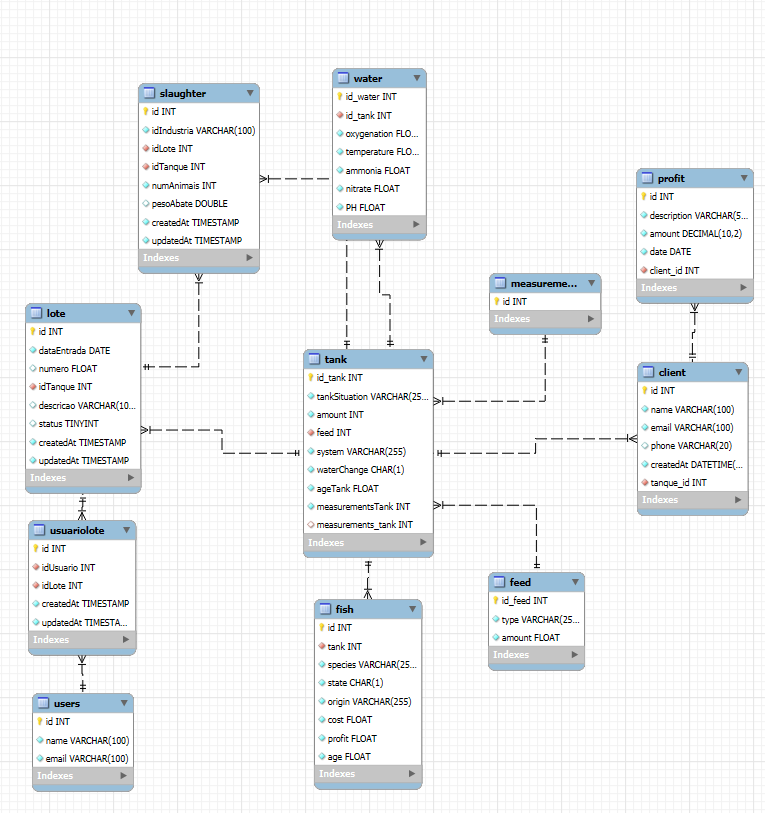

Imagem em Tons de Cinza:


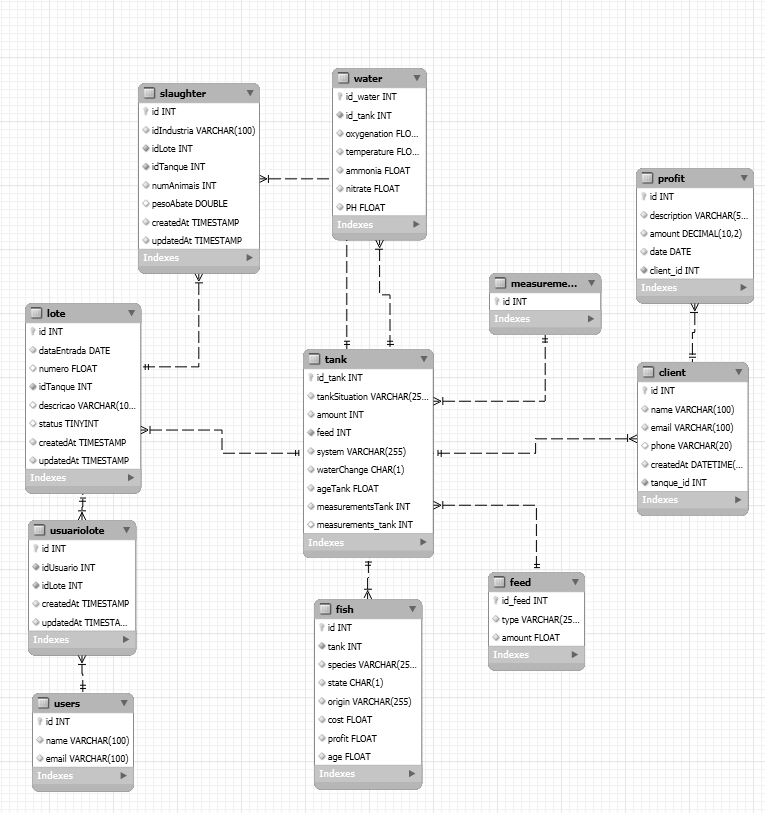

Imagem Binarizada:


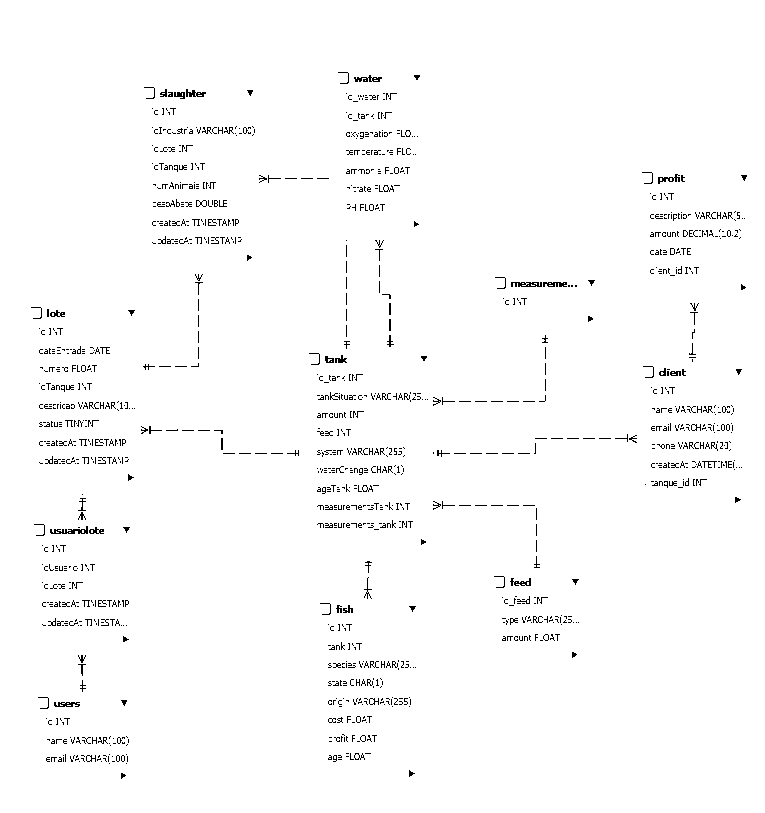

In [35]:
from IPython.display import display

# Converter a imagem para cinza
imagem_cinza = converter_para_escala_cinza(imagem_original)

# Binarizar a imagem
imagem_binaria = binarizar_imagem(imagem_cinza)

# Exibir as imagens processadas
print("Imagem Original:")
display(imagem_original)

print("Imagem em Tons de Cinza:")
display(imagem_cinza)

print("Imagem Binarizada:")
display(imagem_binaria)
